# Práctico 4:

1. Implementar un pipeline de clasificación con la muestra que se vió en clase. El código para traer el dataset es el siguiente:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
dict_keys = (['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
X, y = mnist["data"], mnist["target"]


/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
from sklearn.model_selection import train_test_split

y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [4]:

# 
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [5]:
sgd_clf.predict([X[6878]])

array([False])

In [6]:
print(y_train[6])

5


In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.97192907, 0.96855413, 0.96024858])

In [8]:
from sklearn.dummy import DummyClassifier
never_5_clf = DummyClassifier(strategy="most_frequent")
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91000161, 0.91000161, 0.90999679])

In [9]:


from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

skfolds = StratifiedKFold (n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5): 
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

0.9719290726951304
0.9685541329619114
0.9602485803064396


Matriz de confusion

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[50287,   673],
       [ 1180,  3860]])

Precision y recall

In [11]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8515332009706597

In [12]:
recall_score(y_train_5, y_train_pred)

0.7658730158730159

Uso de F1


In [13]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8064347644416588

In [14]:
from sklearn.metrics import precision_recall_curve 
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    [...] # highlight the threshold and add the legend, axis label, and grid 



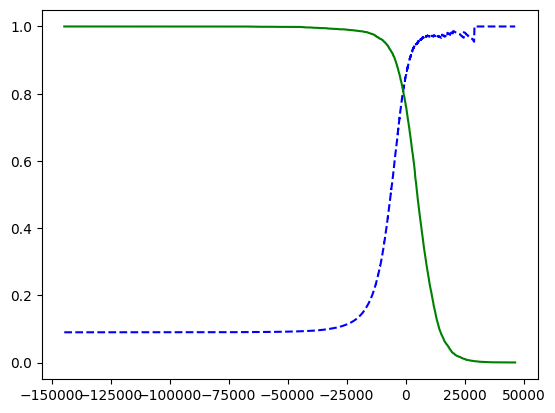

In [15]:

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

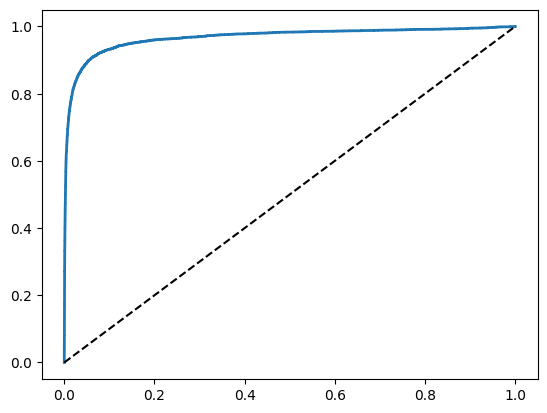

In [16]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal 
    [...] # Add axis labels and grid Lo  

plot_roc_curve(fpr, tpr) 
plt.show() 

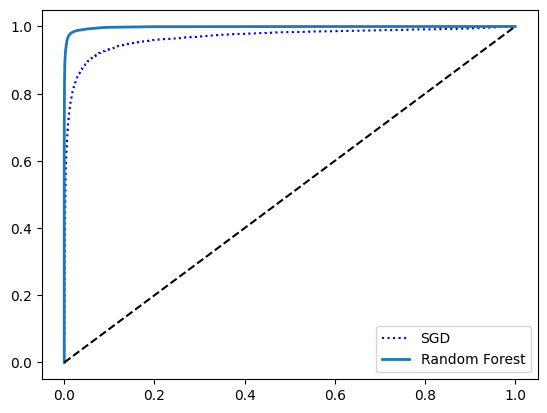

In [17]:
from sklearn.ensemble import RandomForestClassifier 
forest_clf = RandomForestClassifier(random_state = 42) 
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method="predict_proba") 
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [18]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
ovr_clf = OneVsOneClassifier(SVC())

ovr_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [19]:
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84212782, 0.87416296, 0.83129755])

In [20]:
from sklearn.preprocessing import StandardScaler

import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.91059088, 0.90625167, 0.90147862])

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5290,    0,   15,    8,    8,   38,   40,    6,  154,    1],
       [   1, 5996,   42,   15,    3,   35,    8,   10,  155,   12],
       [  26,   28, 4982,   79,   65,   26,   56,   43,  289,   16],
       [  23,   18,  117, 4951,    2,  188,   23,   38,  288,   60],
       [  11,   17,   43,    6, 4986,   12,   43,   27,  213,  171],
       [  37,   16,   26,  148,   45, 4222,   83,   21,  369,   73],
       [  29,   17,   54,    2,   41,   89, 5134,    4,  110,    0],
       [  18,   16,   64,   20,   44,   10,    5, 5282,  103,  228],
       [  20,   59,   45,   79,    3,  130,   28,    7, 5043,   54],
       [  25,   17,   24,   60,  128,   35,    1,  149,  243, 4856]])

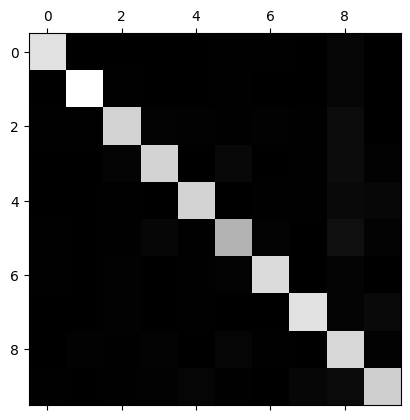

In [22]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


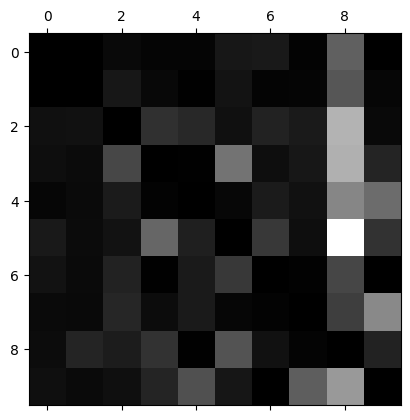

In [23]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

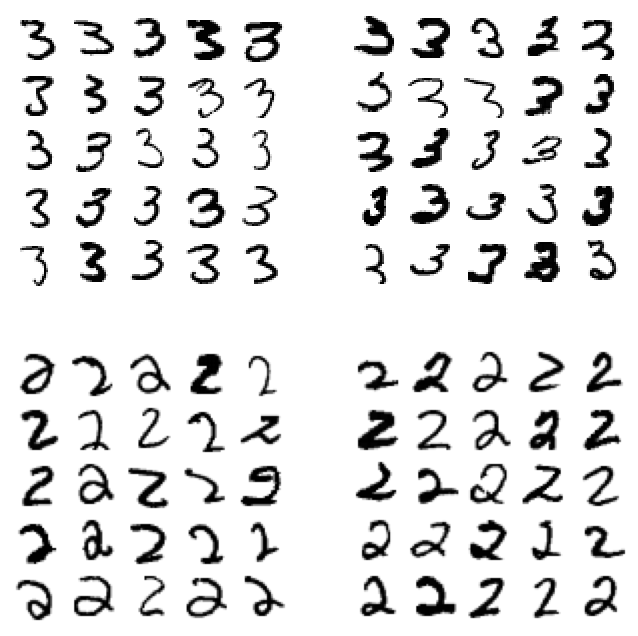

In [31]:
# EXTRA

# import matplotlib

# def plot_digits(instances, images_per_row=10, **options):
#     size = 28
#     images_per_row = min(len(instances), images_per_row)
#     images = [instance.reshape(size,size) for instance in instances]
#     n_rows = (len(instances) - 1) // images_per_row + 1
#     row_images = []
#     n_empty = n_rows * images_per_row - len(instances)
#     images.append(np.zeros((size, size * n_empty)))
#     for row in range(n_rows):
#         rimages = images[row * images_per_row : (row + 1) * images_per_row]
#         row_images.append(np.concatenate(rimages, axis=1))
#     image = np.concatenate(row_images, axis=0)
#     plt.imshow(image, cmap = matplotlib.cm.binary, **options)
#     plt.axis("off")

cl_a, cl_b = '3', '2'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))


plt.subplot(221); plot_digits (X_aa[:25], images_per_row=5) 
plt.subplot(222); plot_digits (X_ab[:25], images_per_row=5) 
plt.subplot(223); plot_digits (X_ba[:25], images_per_row=5) 
plt.subplot(224); plot_digits (X_bb[:25], images_per_row=5) 

plt.show()

#### 2. Luego conteste las siguientes preguntas:
- ¿Que es un clasificador Binario?
- ¿Por qué un modelo con gran accuracy puede que no ser un buen modelo?
- ¿Por qué existe un trade off entre presicion y recall?
- ¿F1 es la mejor métrica que se puede utilizar al momento de optimizar un modelo? Justifique.
- ¿Para que sirve la curva ROC?


a. Un clasificador binario es un modelo de ML que busca predecir si el objeto de estudio pertenece a una de dos clases,generalmente categorizado como True o False.

b. Si tenemos datos desequilibrados podemos obtener una accuracy alta sin siquiera utilizar un modelo (como sucede con never_5). Por lo tanto, se obtiene un accuracy alto solamente prediciendo la clase mayoritaria. 

c. Existe un trade-off debido a que al priorizar una de estas variables, necesariamente estamos afectando a la segunda. Es importante identificar que variable resulta mas critica para nuestro problema, par aasignarle un peso mayor.

d. Como mencionamos anteriormente, aunque el F1 score nos sirve para obtener un buen equilibrio entre recall-precision, a veces necesitamos mucha precision y podemos permitirnos un recall bajo, o viceversa. Lo vemos claro en los ejemplos de deteccion de tumores o transacciones falsas. La metrica de optimizacion de modelo siempre depende del problema.

e. Se utiliza para evaluar el rendimiento de un clasificador binario. EN el eje vertical se representa la Tasa de TP (verdaderos positivos) y en el eje horizontal la Tasa de FP (dalsos positivos). A medida que nos acercamos a la esquina superior izquierda, obtenemos una alta tasa de TP y una baja tasa de FP. Podemos utilizar el area bajo la curva para obtener un valor numerico que represente el rendimiento del modelo, siendo 1.0 un clasificador perfecto y 0.5 un clasificador aleatorio.

#### 3. Utilice el clasificador KNeighborsClassifier y optimice los hiperparámetros utilizando GridSearch. ¿Qué accuracy se alcanza en el test set?

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
parametros = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, parametros, cv=3)  # Usar validación cruzada con 3 folds

grid_search.fit(X_train, y_train_5)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [33]:
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [34]:
mejores_hiperparametros = grid_search.best_params_

knn_optimizado = KNeighborsClassifier(**mejores_hiperparametros)
knn_optimizado.fit(X_train, y_train_5)


KNeighborsClassifier(n_neighbors=7)

In [35]:
y_pred = knn_optimizado.predict(X_test)
accuracy = accuracy_score(y_test_5, y_pred)
print("Accuracy en el conjunto de prueba:", accuracy)

Accuracy en el conjunto de prueba: 0.9948571428571429


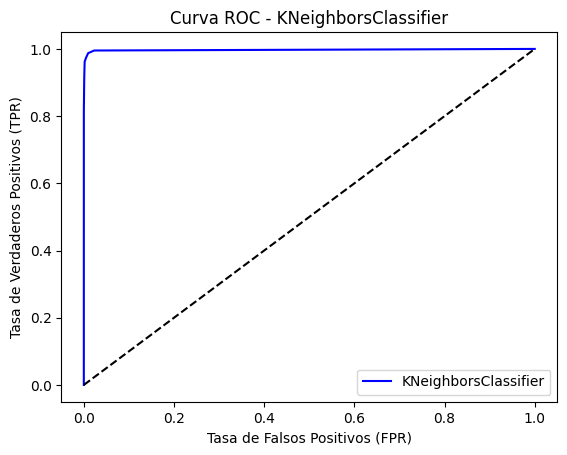

In [36]:


y_probas_knn = knn_optimizado.predict_proba(X_test)
y_scores_knn = y_probas_knn[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_5, y_scores_knn)

# Graficar la curva ROC del modelo optimizado
plt.plot(fpr_knn, tpr_knn, "b-", label="KNeighborsClassifier")
plt.plot([0, 1], [0, 1], 'k--') # Diagonal para referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()
